In [1]:
import os
import torch
from micro_sam.automatic_segmentation import get_predictor_and_segmenter, automatic_instance_segmentation
from tnia.plotting.plt_helper import random_label_cmap, imshow_multi2d
import micro_sam

print(f"micro_sam version: {micro_sam.__version__}")

c:\Users\bnort\miniconda3\envs\microsam_cellpose\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


micro_sam version: 1.5.0


In [2]:

parent_path = r'D:\images\tnia-python-images\imagesc\2024_10_11_tough_cellpose_2'

model_path = os.path.join(parent_path, 'models')

model_name = os.path.join(model_path, 'microsam_heavy_augmentation')
model_name = os.path.join(model_path, 'microsam_where_we_go_question_mark')

checkpoint_name = "checkpoints"
checkpoint_name = "microsam_checkpoint"
best_checkpoint = os.path.join(model_name, "checkpoints", checkpoint_name, "best.pt")

In [3]:
tile_shape = (384, 384)
halo = (64, 64)
model_type = "vit_b"

device = "cuda" if torch.cuda.is_available() else "cpu" # the device/GPU used for training
# Step 1: Get the 'predictor' and 'segmenter' to perform automatic instance segmentation.
predictor, segmenter = get_predictor_and_segmenter(
    model_type=model_type, # choice of the Segment Anything model
    checkpoint=best_checkpoint,  # overwrite to pass your own finetuned model.
    device=device,  # the device to run the model inference.
    is_tiled = (tile_shape is not None),  # whether the model is tiled or not.
)



ValueError: Checkpoint at 'D:\images\tnia-python-images\imagesc\2024_10_11_tough_cellpose_2\models\microsam_where_we_go_question_mark\checkpoints\microsam_checkpoint\best.pt' could not be found.

In [5]:
from skimage.io import imread

image = imread(r"D:\images\tnia-python-images\imagesc\2024_12_19_sem_grain_size_revisit\211122_AM_Al2O3_SE_021.ome.tiff")
image.shape

(1536, 2048)

In [6]:

# Step 2: Get the instance segmentation for the given image.
prediction = automatic_instance_segmentation(
    predictor=predictor,  # the predictor for the Segment Anything model.
    segmenter=segmenter,  # the segmenter class responsible for generating predictions.
    input_path=image,
    #ndim=2,
    tile_shape=tile_shape,
    halo=halo,
)



Compute Image Embeddings 2D tiled: 100%|██████████| 24/24 [00:08<00:00,  2.67it/s]
Initialize tiled instance segmentation with decoder: 100%|██████████| 24/24 [00:02<00:00,  8.11it/s]


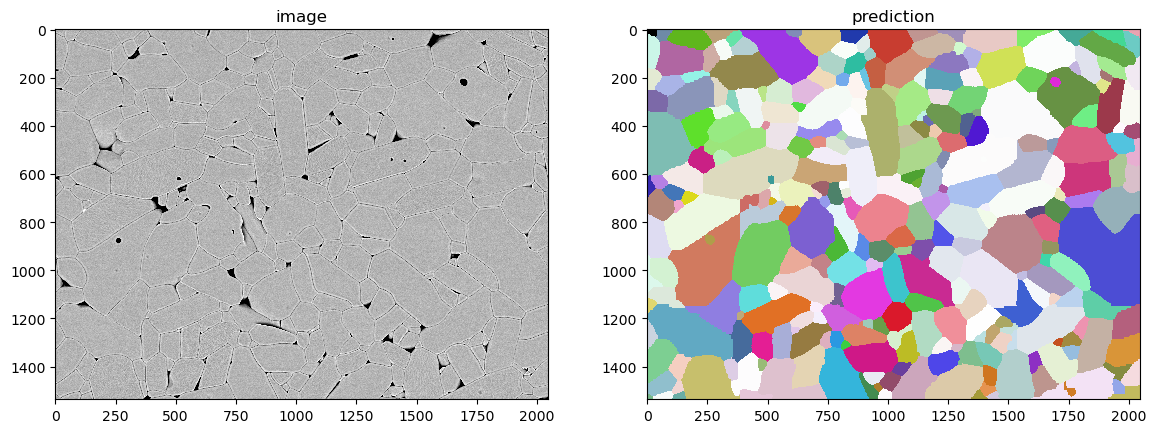

In [7]:
fig = imshow_multi2d([image, prediction], ['image', 'prediction'], 1, 2, 14, 7, colormaps=['gray', random_label_cmap()])